# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
%matplotlib inline

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from datetime import datetime

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}&appid={weather_api_key}&q="

# Define empty lists to fetch the weather data for each city
city_data = []
lat = []
long = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_data.append(city)
        print(f"found city: {city}")
        
        #If an error is experienced, skip the city
    except:
        print(f"City NOT found: {city}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
found city: ribeira grande
Processing Record 2 of Set 1 | adamstown
found city: adamstown
Processing Record 3 of Set 1 | nizhneudinsk
found city: nizhneudinsk
Processing Record 4 of Set 1 | papatowai
found city: papatowai
Processing Record 5 of Set 1 | puerto ayora
found city: puerto ayora
Processing Record 6 of Set 1 | bethel
found city: bethel
Processing Record 7 of Set 1 | edinburgh of the seven seas
found city: edinburgh of the seven seas
Processing Record 8 of Set 1 | cumaribo
City NOT found: cumaribo
Processing Record 9 of Set 1 | port-aux-francais
found city: port-aux-francais
Processing Record 10 of Set 1 | grytviken
found city: grytviken
Processing Record 11 of Set 1 | whitehorse
found city: whitehorse
Processing Record 12 of Set 1 | cargados carajos
City NOT found: cargados carajos
Processing Record 13 of Set 1 | albany
found city: albany
Processing Record 14 of Set 1 | a

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_ = {"City": city_data,"Latitude": lat, "Longitude":long,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":clouds,
                "Wind Speed":wind,"Country":country, "Date":date}
city_data_df = pd.DataFrame(city_data_)
# Show Record Count
city_data_df.count()

City          566
Latitude      566
Longitude     566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,289.14,77,12,3.13,PT,1686446244
1,adamstown,-25.0660,-130.1015,293.71,55,53,5.73,PN,1686446244
2,nizhneudinsk,54.9076,99.0276,286.24,96,100,2.93,RU,1686446244
3,papatowai,-46.5619,169.4708,283.15,77,100,1.81,NZ,1686446244
4,puerto ayora,-0.7393,-90.3518,299.57,91,92,4.47,EC,1686446244


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,289.14,77,12,3.13,PT,1686446244
1,adamstown,-25.0660,-130.1015,293.71,55,53,5.73,PN,1686446244
2,nizhneudinsk,54.9076,99.0276,286.24,96,100,2.93,RU,1686446244
3,papatowai,-46.5619,169.4708,283.15,77,100,1.81,NZ,1686446244
4,puerto ayora,-0.7393,-90.3518,299.57,91,92,4.47,EC,1686446244


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

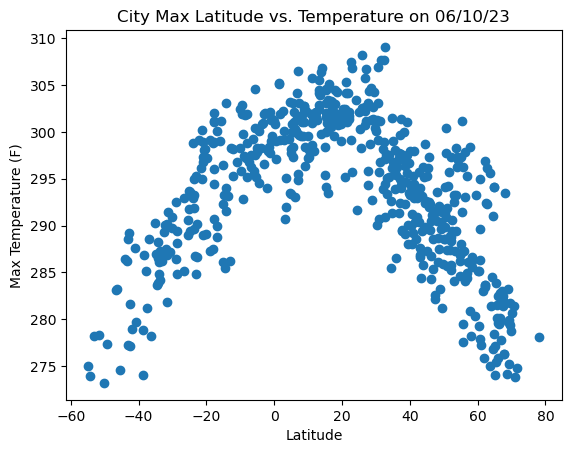

In [44]:
RunDate = time.strftime("%m/%d/%y")

#set data to plot

# Build scatter plot for latitude vs. temperature
scatlat = city_data_df["Latitude"]
scattemp = city_data_df["Max Temp"]

plt.scatter(scatlat,scattemp)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature on {RunDate}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/scatplotlatitudemaxtemp")

# Show plot
plt.show()

#### Latitude Vs. Humidity

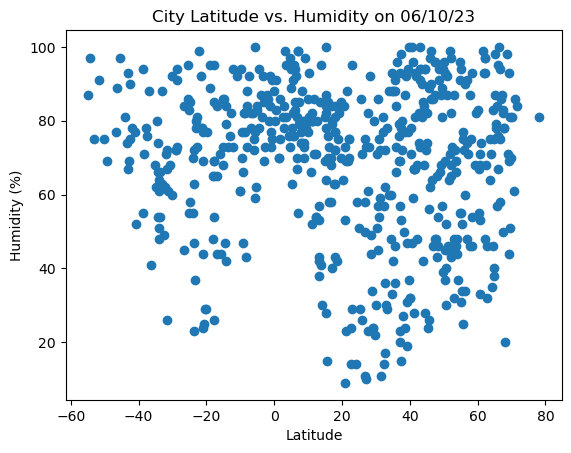

In [45]:
RunDate = time.strftime("%m/%d/%y")

# Build the scatter plots for latitude vs. humidity
scathum = city_data_df["Humidity"]

plt.scatter(scatlat,scathum)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity on {RunDate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/scatplotlatitudehumidity")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

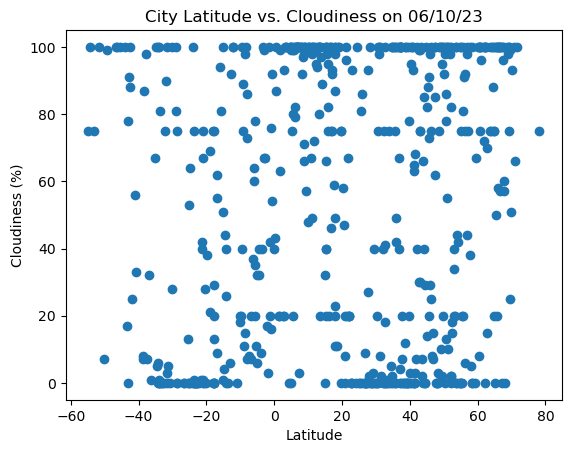

In [46]:
RunDate = time.strftime("%m/%d/%y")

# Build the scatter plots for latitude vs. cloudiness
scatcloud = city_data_df["Cloudiness"]

plt.scatter(scatlat,scatcloud)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness on {RunDate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/scatplotlatitudecloudiness")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

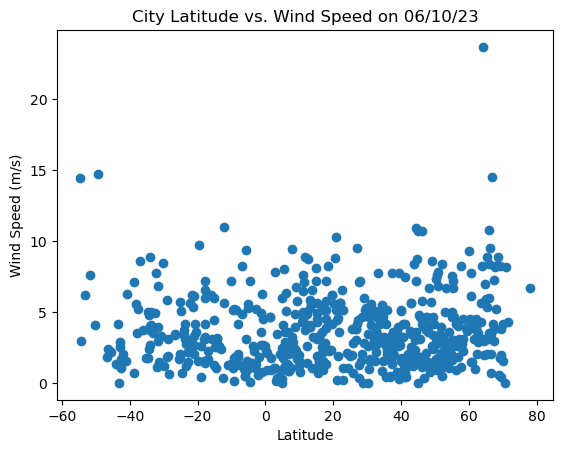

In [47]:
RunDate = time.strftime("%m/%d/%y")

# Build the scatter plots for latitude vs. wind speed
scatwindsp = city_data_df["Wind Speed"]

plt.scatter(scatlat,scatwindsp)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed on {RunDate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/scatplotlatitudewindspeed")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, a, b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.savefig(f"output_data/{title}")
    plt.show()
    print(f"The r-squared is: {rvalue}")
    return line_eq

   

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,289.14,77,12,3.13,PT,1686446244
2,nizhneudinsk,54.9076,99.0276,286.24,96,100,2.93,RU,1686446244
5,bethel,41.3712,-73.4140,292.94,67,0,1.54,US,1686446244
9,whitehorse,60.7161,-135.0538,289.58,33,75,7.72,CA,1686446245
10,albany,42.6001,-73.9662,290.38,74,30,1.96,US,1686446153


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,293.71,55,53,5.73,PN,1686446244
3,papatowai,-46.5619,169.4708,283.15,77,100,1.81,NZ,1686446244
4,puerto ayora,-0.7393,-90.3518,299.57,91,92,4.47,EC,1686446244
6,edinburgh of the seven seas,-37.0676,-12.3116,288.52,88,32,8.56,SH,1686446245
7,port-aux-francais,-49.3500,70.2167,277.40,69,99,14.69,TF,1686445807


###  Temperature vs. Latitude Linear Regression Plot

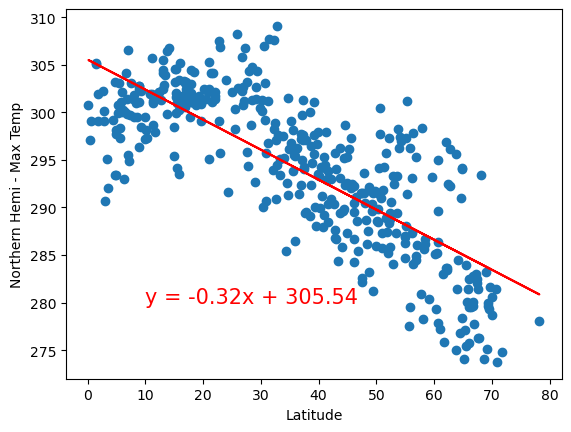

The r-squared is: -0.7817368457499195


'y = -0.32x + 305.54'

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Northern Hemi - Max Temp", 10, 280)


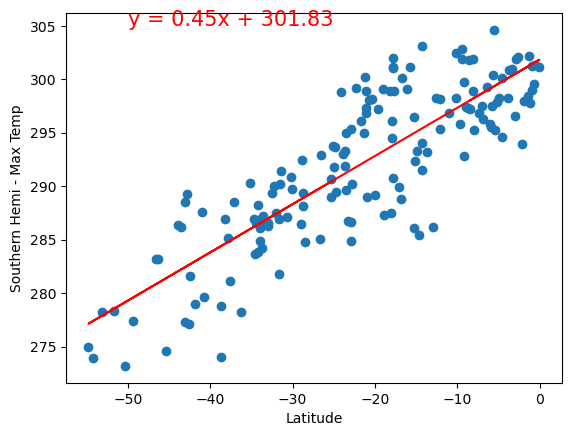

The r-squared is: 0.8416465158537443


'y = 0.45x + 301.83'

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Southern Hemi - Max Temp",-50,305)

**Discussion about the linear relationship:** 
The northern hemisphere plot correlattion is negative while the southern hemisphere plot correlation is positive. Both r-squared values indicate a strong relationship between latitude and maximum temperature. These two plots have an equal linear regression line max at (0, 305). The equator is latitude, longitude (0,0) and is the hottest spot on earth. The further north or south one goes, the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

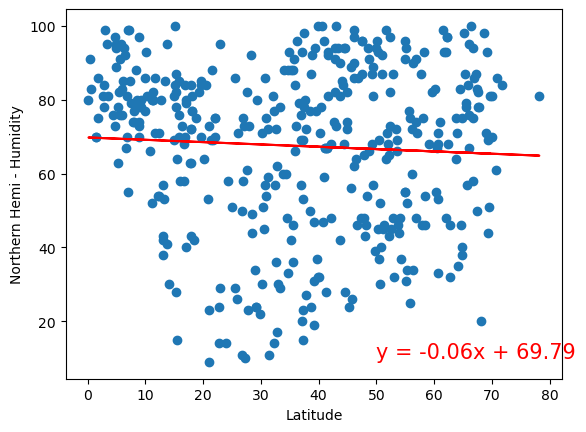

The r-squared is: -0.0559325809241698


'y = -0.06x + 69.79'

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Northern Hemi - Humidity", 50, 10)

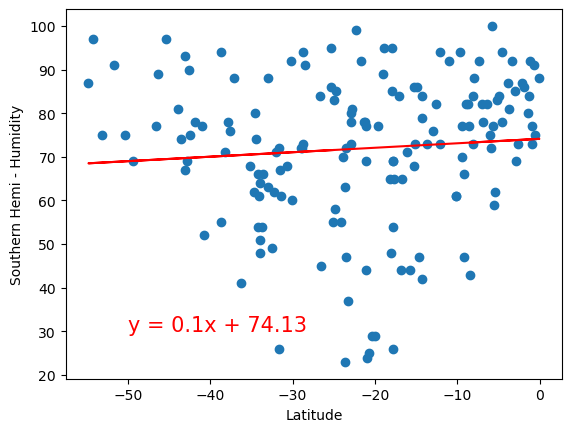

The r-squared is: 0.08213005592429477


'y = 0.1x + 74.13'

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Southern Hemi - Humidity", -50, 30)

**Discussion about the linear relationship:** 
There is no correlation between latitude and humidity. The r-squared values suggest little to no relationship between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

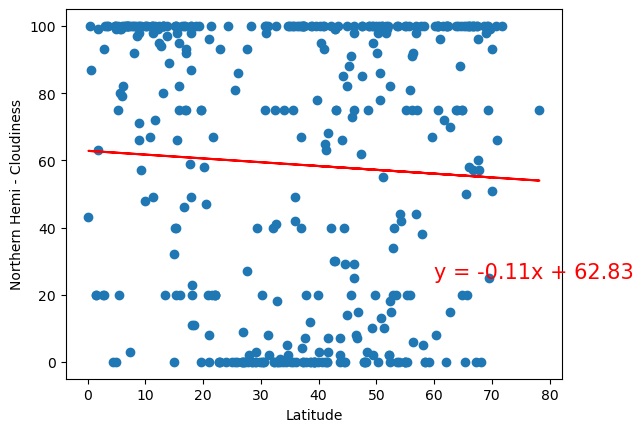

The r-squared is: -0.05424264473904693


'y = -0.11x + 62.83'

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Northern Hemi - Cloudiness", 60, 25)

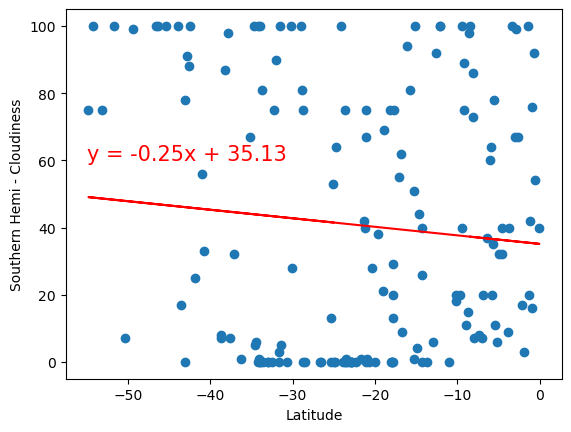

The r-squared is: -0.09119483019407727


'y = -0.25x + 35.13'

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Southern Hemi - Cloudiness", -55, 60)

**Discussion about the linear relationship:** 
There is no correlation between latitude and cloudiness. The r-squared values suggest little to no relationship between the two variables, but they do continue on a slightly negative slope as one goes from south to north.

### Wind Speed vs. Latitude Linear Regression Plot

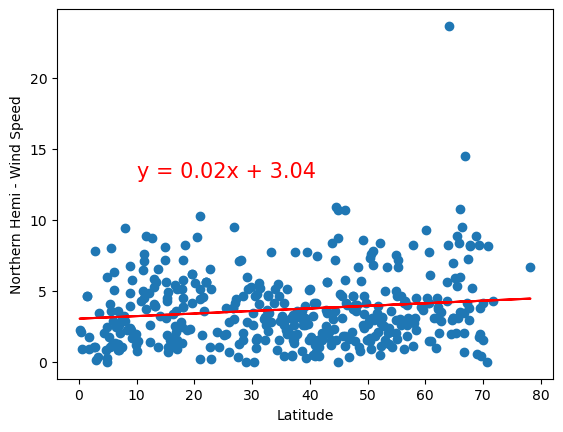

The r-squared is: 0.13783350239981199


'y = 0.02x + 3.04'

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Northern Hemi - Wind Speed", 10, 13)

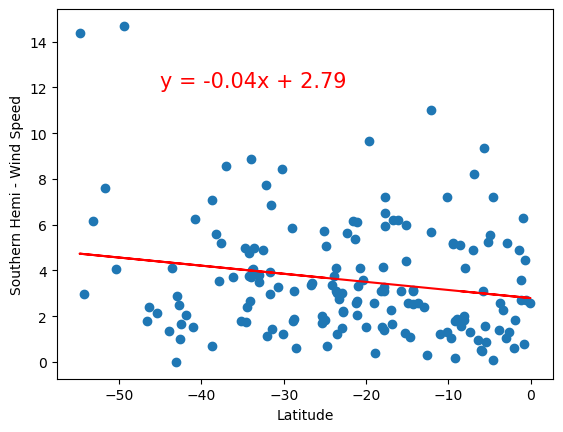

The r-squared is: -0.1935496644844691


'y = -0.04x + 2.79'

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Southern Hemi - Wind Speed", -45, 12)

**Discussion about the linear relationship:** 
There is no correlation between latitude and wind speed. The r-squared values suggest little to no relationship between the two variables.